# PFAS Toolbox

### 1) Libraries Import (REQUIRED)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
import openpyxl 

### 2) Data Import and Export (REQUIRED)

Please note that there are a couple of different ways to import the data. Please choose the most convenient way for your analysis.

#### Define Functions for Data Import and Export (Required)

In [2]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [3]:
def dfs_to_excel(dfs, filename):
    """
    Write an array of dataframes to separate tabs in an Excel file.
    
    Parameters:
    - dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
    - filename: The name of the Excel file to write to.
    """
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        for tab_name, df in dfs.items():
            # Write each dataframe to a separate sheet
            df.to_excel(writer, sheet_name=tab_name)
    
    print(f"File '{filename}' has been written with {len(dfs)} tabs.")



#### OPTION 1) Import Data from Excel Macro

NOTE: This is the original file format of the PFAS database. This will take the longest but will not require the user to convert the database to a different format. This is the recommended way if wanting to run a few analysis tasks.

In [4]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 03-25-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### OPTION 2) Import Data from Excel Workbook

Note: This requires the user to transform the original Excel macro file to an Excel workbook (notice the difference in the file extesnsion). To speead up the data import, it is recommended to delete analysis tabs. This method is recommended if planning to run several analysis tasks.

In [6]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Old Databases and Spreadsheets/Database as of 11-27-2023 w Plots for ACWA Toxics-copy.xlsx'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


### 3) Import Other Data (REQUIRED)

In [5]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 03-25-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)


In [6]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

#### 3.2 Import Industry Flows

In [7]:
# Specify the sheet name or index
sheet_to_read = 'June 2023 MH and Ind Flows'

# Since you want to start at row 15, you need to skip the first 14 rows (considering the first row as row 1)
# Note: pandas uses 0-based indexing, so row 15 in Excel is row 14 in pandas, hence skiprows=14
skiprows = 14

# Number of rows to read starting from row 15 to row 87 is 87 - 15 + 1 = 73
# +1 because the end row is inclusive
nrows = 72

# Read the specified range of rows from the specified sheet
Industry_Flows_df = pd.read_excel(excel_file_path, sheet_name=sheet_to_read, skiprows=skiprows, nrows=nrows)

Industry_Flows_df


,Industry,Permitted Industry Flow (MGD),WRRF,PFAS Data,Type,Fraction of Total Ind Flow to WRRF,PFAS Assumption
0,Fujimi Corporation,0.021666,Durham,x,NaN,0.021380,Fujimi Corporation
1,Cascade Columbia Distribution Co,0.006538,Durham,NaN,Chemicals,0.006452,TOK America
2,Maxim (Analog),0.516057,Durham,x,NaN,0.509260,Maxim (Analog)
3,Pacific Foods,0.332290,Durham,NaN,Foods,0.327913,Zero
4,Pacific Nutritional Foods,0.033434,Durham,NaN,Foods,0.032994,Zero
...,...,...,...,...,...,...,...
67,Oregon Health Sciences University West Campus ...,0.047622,Rock Creek,NaN,Noncommercial Research,0.007483,Zero
68,DEQ Laboratory,0.002800,Rock Creek,NaN,Noncommercial Research,0.000440,Zero
69,"Alliance Packaging, Inc.",0.000346,Rock Creek,NaN,Paper Products,0.000054,International Paper
70,"Genentech, Inc.",0.045660,Rock Creek,NaN,Pharmaceutical Manufacturing,0.007175,Zero


### 20) Industry Conc 20-23 for MB BQL

In [44]:
# Assuming data_df is your DataFrame and it has been loaded correctly
# Convert the 'Sampled Date' column to datetime format if it's not already
data_df['Sampled Date'] = pd.to_datetime(data_df['Sampled Date'])

# Define your start and end dates for the range
start_date = '2019-08-15'  # replace with your start date
end_date = '2023-12-06'  # replace with your end date

# Define the type or types you want to filter by
types_to_include = ['Outfall of Industry']  # replace with the types you're interested in

# Create the mask for date range
date_mask = (data_df['Sampled Date'] >= start_date) & (data_df['Sampled Date'] <= end_date)

# Create the mask for types
type_mask = data_df['Type'].isin(types_to_include)

data_df=data_df[~((data_df['Sample Location'] == 'Intel Ronler WATR') & (data_df['Sampled Date'].dt.year == 2019))]

# Apply both masks to filter the DataFrame
filtered_df = data_df[date_mask & type_mask]


<ipython-input-44-6f14e926782f>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = data_df[date_mask & type_mask]


In [45]:
filtered_df['PFAS Compound'].unique()

array(['10:2Fluorotelomersulfonic acid', '11Cl-PF3OUdS',
       '4:2 Fluorotelomersulfonic acid', '6:2 Fluorotelomersulfonic acid',
       '8:2 Fluorotelomersulfonic acid', '9Cl-PF3ONS', 'ADONA', 'HFPO-DA',
       'NEtFOSAA', 'NMeFOSAA', 'Perfluorobutanesulfonic acid',
       'Perfluorobutanoic acid', 'Perfluorodecanesulfonic acid',
       'Perfluorodecanoic acid', 'Perfluorododecanesulfonic acid',
       'Perfluorododecanoic acid', 'Perfluoroheptanesulfonic acid',
       'Perfluoroheptanoic acid', 'Perfluorohexadecanoic acid',
       'Perfluorohexanesulfonic acid', 'Perfluorohexanoic acid',
       'Perfluorononanesulfonic acid', 'Perfluorononanoic acid',
       'Perfluorooctadecanoic acid', 'Perfluorooctanesulfonamide',
       'Perfluorooctanesulfonic acid (PFOS)',
       'Perfluorooctanoic acid (PFOA)', 'Perfluoropentanesulfonic acid',
       'Perfluoropentanoic acid', 'Perfluorotetradecanoic acid',
       'Perfluorotridecanoic acid', 'Perfluoroundecanoic acid', 'NEtFOSA',
       'NE

In [46]:
filtered_df['Sample Location'].unique()

array(['Anodize Solutions', 'Hillsboro Landfill', 'Intel Aloha F15',
       'Intel Ronler PAWN', 'Pioneer Metal Finishing',
       'Port Portland Aeroair', 'Prudential Cleanroom', 'Quantum Global',
       'TOK America', 'TTM', 'Hillsboro Airport GW', 'WM Landfill-Comb',
       'WM Landfill-Hillsboro', 'WM Landfill-Riverbend',
       'International Paper', 'NW Rubber Extruders', 'FormFactor',
       'Fujimi Corporation', 'JAE Oregon Inc', 'Lam Research Corp',
       'Maxim (Analog)', 'Tektronix Bldg 50', 'ACUMED LLC',
       'Intel Ronler WATR', 'Jireh Semiconductor Inc',
       'Leupold & Stevens Inc', 'Lotus Applied Tech', 'OSRAM Opto Inc',
       'Qorvo', 'Seals Unlimited Inc', 'Sumitomo Inc', 'Davis Tool',
       'Sheldon Manufacturing Inc', 'Westak'], dtype=object)

#### 20.1) Functions

In [47]:
def create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter,column_name):
    """
    Create a pivot table from the given dataframe with specified filters and date range.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date'.
        end_date (str): End date for filtering 'Sample Date'.
        type_filter (list): Filter values for 'Type'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.
        sample_location_filter (list): Filter values for 'Sample Location'.
        column_name (string): Name of the column to use for the pivot table values.

    Returns:
        pd.DataFrame: The resulting pivot table.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply filters based on user-provided values
    filtered_data = data_df[
        data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        data_df['Type'].isin(type_filter) &
        data_df['PFAS Compound'].isin(pfas_compound_filter) &
        data_df['Sample Location'].isin(sample_location_filter)
    ]

    # Create the pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values=column_name,
        index='PFAS Compound',
        columns=['Type', 'Sample Location'],
        aggfunc='mean'
    )

    return pivot_table

In [48]:
def create_sector_median_pivot(data_df, pivot_table, sample_location_col='Sample Location', sector_col='Sector', pfas_compound_col='PFAS Compound', value_col='Value'):
    """
    Create a pivot table with sectors as rows, PFAS Compounds as columns, 
    and median values for each PFAS Compound within each sector.
    
    Args:
        data_df (pd.DataFrame): Original DataFrame containing at least 'Sample Location', 'Sector', 'PFAS Compound', and values.
        pivot_table (pd.DataFrame): Pivot table created from 'data_df'.
        sample_location_col (str): Name of the column in 'data_df' that contains sample locations.
        sector_col (str): Name of the column in 'data_df' that contains sector information.
        pfas_compound_col (str): Name of the column in 'data_df' that contains PFAS Compound names.
        value_col (str): Name of the column in 'pivot_table' that contains the values for PFAS Compounds.
    
    Returns:
        pd.DataFrame: New pivot table with sectors as rows, PFAS Compounds as columns, and median values.
    """
    # Map 'Sample Location' to 'Sector'
    location_to_sector = data_df[[sample_location_col, sector_col]].drop_duplicates().set_index(sample_location_col)[sector_col].to_dict()
    pivot_table['Sector'] = pivot_table.index.map(location_to_sector)

    # Melt the pivot table for easier grouping
    melted = pivot_table.melt(id_vars=['Sector'], var_name=pfas_compound_col, value_name=value_col)

    # Group by 'Sector' and 'PFAS Compound' and calculate median
    medians = melted.groupby(['Sector', pfas_compound_col]).median().reset_index()

    # Pivot the median data to get the desired table format
    median_pivot_table = medians.pivot(index='Sector', columns=pfas_compound_col, values=value_col)

    return median_pivot_table



In [49]:
def replace_nan_with_sector_median_averages(pivot_table, median_pivot, sectors=['Electrical and Electronic Components', 'Metal Finishing']):
    """
    Replace NaN values in the pivot table with the average of the medians for specified sectors.

    Args:
        pivot_table (pd.DataFrame): The original pivot table with PFAS Compounds as columns and Sample Locations as index.
        median_pivot (pd.DataFrame): Pivot table with sectors as rows, PFAS Compounds as columns, and median values.
        sectors (list): List of sectors to calculate the average of the medians.

    Returns:
        pd.DataFrame: Updated pivot table with NaN values replaced.
    """
    # Calculate the average of the medians for the specified sectors
    avg_medians = median_pivot.loc[sectors].mean().to_dict()

    # Iterate over the pivot table and replace NaN values
    for compound in pivot_table.columns:
        if compound in avg_medians:
            # Replace NaN values in this PFAS Compound column with the average median
            pivot_table[compound] = pivot_table[compound].fillna(avg_medians[compound])

    return pivot_table



In [50]:
def replace_values(pivot_table):
    """
    Replace 0 values with 'BDL' and NaN values with 'NS' in the pivot table.

    Args:
        pivot_table (pd.DataFrame): The pivot table to modify.

    Returns:
        pd.DataFrame: The modified pivot table.
    """
    # Define the custom function to apply to each cell
    def custom_replace(value):
        if pd.isna(value):  # Check if the value is NaN
            return 'NS'
        elif value == 0:  # Check if the value is 0
            return 'BDL'
        else:
            return value
    
    # Apply the custom function to each cell in the pivot table
    modified_pivot_table = pivot_table.applymap(custom_replace)
    
    return modified_pivot_table



#### 20.2) Filters and Settings

In [51]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','']

#start_date (str): Start date for filtering 'Sample Date'.
start_date='2019-08-15'

#end_date (str): End date for filtering 'Sample Date'.
end_date='2023-12-06'

#type_filter (list): Filter values for 'Type'.
type_filter=['Outfall of Industry']

#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter = ['10:2Fluorotelomersulfonic acid', '11Cl-PF3OUdS',
       '4:2 Fluorotelomersulfonic acid', '6:2 Fluorotelomersulfonic acid',
       '8:2 Fluorotelomersulfonic acid', '9Cl-PF3ONS', 'ADONA', 'HFPO-DA',
       'NEtFOSAA', 'NMeFOSAA', 'Perfluorobutanesulfonic acid',
       'Perfluorobutanoic acid', 'Perfluorodecanesulfonic acid',
       'Perfluorodecanoic acid', 'Perfluorododecanesulfonic acid',
       'Perfluorododecanoic acid', 'Perfluoroheptanesulfonic acid',
       'Perfluoroheptanoic acid', 'Perfluorohexadecanoic acid',
       'Perfluorohexanesulfonic acid', 'Perfluorohexanoic acid',
       'Perfluorononanesulfonic acid', 'Perfluorononanoic acid',
       'Perfluorooctadecanoic acid', 'Perfluorooctanesulfonamide',
       'Perfluorooctanesulfonic acid (PFOS)',
       'Perfluorooctanoic acid (PFOA)', 'Perfluoropentanesulfonic acid',
       'Perfluoropentanoic acid', 'Perfluorotetradecanoic acid',
       'Perfluorotridecanoic acid', 'Perfluoroundecanoic acid', 'NEtFOSA',
       'NEtFOSE', 'NMeFOSA', 'NMeFOSE']

#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter = ['Anodize Solutions', 'Hillsboro Landfill', 'Intel Aloha F15',
       'Intel Ronler PAWN', 'Intel Ronler WATR',
       'Pioneer Metal Finishing', 'Port Portland Aeroair',
       'Prudential Cleanroom', 'Quantum Global', 'TOK America', 'TTM',
       'Hillsboro Airport GW',
       'International Paper', 'NW Rubber Extruders', 'FormFactor',
       'Fujimi Corporation', 'JAE Oregon Inc', 'Lam Research Corp',
       'Maxim (Analog)', 'Tektronix Bldg 50', 'ACUMED LLC',
       'Jireh Semiconductor Inc', 'Leupold & Stevens Inc',
       'Lotus Applied Tech', 'OSRAM Opto Inc', 'Qorvo',
       'Seals Unlimited Inc', 'Sumitomo Inc', 'Davis Tool',
       'Sheldon Manufacturing Inc', 'Westak']

#column_name (string): Name of the column to use for the pivot table values.
column_name='Quant Incl Estimates Incl Qual Flags'

#sectors (list): List of sectors to calculate the average of the medians.
sectors=['Electrical and Electronic Components', 'Metal Finishing']

#### 20.3) Create Pivot Table for Average 'Quant Incl Estimates Incl Qual Flags' at Sample Locations

In [52]:
Allpivot_table=create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter,column_name)
Allpivot_table=Allpivot_table.transpose().reset_index(level=0, drop=True)

#Add the corresponding Sector for each Sample Location
# Step 1: Drop duplicates to ensure each 'Sample Location' maps to one 'Sector'
unique_locations = data_df[['Sample Location', 'Sector']].drop_duplicates()

# Step 2: Create a mapping from 'Sample Location' to 'Sector'
location_to_sector = unique_locations.set_index('Sample Location')['Sector'].to_dict()

# Step 3: Map 'Sample Location' in pivot_table to 'Sector' and add as a new column
Allpivot_table['Sector'] = Allpivot_table.index.map(location_to_sector)

Allpivot_table

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid,Sector
Sample Location,,,,,,,,,,,,,,,,,,,,,
Anodize Solutions,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,14.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,Metal Finishing
Davis Tool,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,NaN,0.0,0.00,...,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,Metal Finishing
FormFactor,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,NaN,0.0,0.00,...,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,Metal Finishing
Fujimi Corporation,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,NaN,0.0,0.00,...,0.0,0.000000,0.000000,0.750000,0.000,0.000000,0.000000,0.000000,0.000000,Abrasive Products
Hillsboro Airport GW,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,NaN,0.00,...,0.0,0.000000,12.000000,0.510000,2.400,1.000000,0.000000,0.000000,0.000000,Airport Groundwater
Hillsboro Landfill,0.0,0.0,11.275,576.000000,34.25,0.0,0.0,14.750000,0.0,129.20,...,0.0,7.525000,940.000000,1433.333333,116.750,2133.333333,0.000000,0.000000,9.600000,Leachate from Hillsboro Landfill
Intel Aloha F15,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,2.200000,0.000000,0.000000,0.000,0.132500,0.000000,0.000000,0.000000,Electrical and Electronic Components
Intel Ronler PAWN,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.753333,0.136667,0.053333,0.000,0.323333,0.000000,0.000000,0.000000,Electrical and Electronic Components
Intel Ronler WATR,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.000000,0.000000,0.000,0.825000,0.000000,0.000000,0.000000,Electrical and Electronic Components


#### 20.4) Create Table for Median Values for Each Sector

In [53]:
Allmedian_pivot=create_sector_median_pivot(data_df, Allpivot_table, sample_location_col='Sample Location', sector_col='Sector', pfas_compound_col='PFAS Compound', value_col=column_name)
Allmedian_pivot

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorononanoic acid,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid
Sector,,,,,,,,,,,,,,,,,,,,,
Abrasive Products,0.0,0.0,0.000,0.00,0.00,0.0,0.0,NaN,0.0,0.0,...,0.710000,0.0,0.0000,0.000000,0.750000,0.00,0.000000,0.00,0.000000,0.000000
Airplane Hangar,0.0,0.0,0.000,0.00,0.48,0.0,0.0,1.20,0.0,0.0,...,152.600000,0.0,0.2750,1.200000,228.000000,0.00,61.300000,19.85,28.950000,177.250000
Airport Groundwater,0.0,0.0,0.000,0.00,0.00,0.0,0.0,0.00,NaN,0.0,...,0.000000,0.0,0.0000,12.000000,0.510000,2.40,1.000000,0.00,0.000000,0.000000
Chemicals,0.0,0.0,0.000,5.00,0.60,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.0,0.5500,22.500000,2.000000,0.00,2.200000,0.00,0.000000,0.000000
Electrical and Electronic Components,0.0,0.0,0.000,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,0.054167,0.0,0.0925,0.068333,0.026667,0.00,0.574167,0.00,0.000000,0.000000
Industrial Launderers,0.0,0.0,0.000,5.44,0.00,0.0,0.0,0.00,0.0,0.0,...,1.333333,0.0,0.0000,0.400000,3.666667,0.00,0.360000,0.00,0.416667,0.936667
Leachate from Hillsboro Landfill,0.0,0.0,11.275,576.00,34.25,0.0,0.0,14.75,0.0,129.2,...,95.600000,0.0,7.5250,940.000000,1433.333333,116.75,2133.333333,0.00,0.000000,9.600000
Metal Finishing,0.0,0.0,0.000,0.80,0.00,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.0,0.4700,3.750000,0.440000,0.00,0.575000,0.00,0.000000,0.000000
Paper Products,0.0,0.0,0.000,38.00,0.00,0.0,0.0,1.52,0.0,0.0,...,0.000000,0.0,0.0000,29.400000,1.866667,0.00,14.750000,0.00,0.000000,0.000000


#### 20.5 Replace Not a Number values with the average of the median concentrations for that compound for the defined sectors

In [54]:
AllReplacedPivot=replace_nan_with_sector_median_averages(Allpivot_table, Allmedian_pivot, sectors)
AllReplacedPivot

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid,Sector
Sample Location,,,,,,,,,,,,,,,,,,,,,
Anodize Solutions,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,14.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,Metal Finishing
Davis Tool,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,Metal Finishing
FormFactor,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,Metal Finishing
Fujimi Corporation,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.000000,0.750000,0.000,0.000000,0.000000,0.000000,0.000000,Abrasive Products
Hillsboro Airport GW,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,12.000000,0.510000,2.400,1.000000,0.000000,0.000000,0.000000,Airport Groundwater
Hillsboro Landfill,0.0,0.0,11.275,576.000000,34.25,0.0,0.0,14.750000,0.0,129.20,...,0.0,7.525000,940.000000,1433.333333,116.750,2133.333333,0.000000,0.000000,9.600000,Leachate from Hillsboro Landfill
Intel Aloha F15,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,2.200000,0.000000,0.000000,0.000,0.132500,0.000000,0.000000,0.000000,Electrical and Electronic Components
Intel Ronler PAWN,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.753333,0.136667,0.053333,0.000,0.323333,0.000000,0.000000,0.000000,Electrical and Electronic Components
Intel Ronler WATR,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.000000,0.000000,0.000,0.825000,0.000000,0.000000,0.000000,Electrical and Electronic Components


### 20.B) Mass Balance

#### 20.B.1) Functions

In [55]:
def fill_pfass_and_permitted_flow(new_df, average_df, flows_df):
    # Add a new row for 'Permitted Flow (MGD)' with NaN values initially
    new_df.loc['Permitted Flow (MGD)', :] = pd.NA
    
    # Iterate over the columns in the new dataframe
    for column in new_df.columns:
        # Find the PFAS Assumption for each column in new_df
        pfas_assumption = new_df.loc['PFAS Assumption', column]
        
        # Fill in PFAS concentration values by matching with average_df
        if pfas_assumption in average_df.index:
            for pfas_compound in new_df.index.drop('PFAS Assumption'):
                if pfas_compound in average_df.columns:
                    concentration = average_df.loc[pfas_assumption, pfas_compound]
                    new_df.at[pfas_compound, column] = concentration

        # Match column names with 'Industry' in flows_df to get 'Permitted Industry Flow (MGD)'
        permitted_flow = flows_df.loc[flows_df['Industry'] == column, 'Permitted Industry Flow (MGD)']
        if not permitted_flow.empty:
            new_df.at['Permitted Flow (MGD)', column] = permitted_flow.values[0]

    return new_df



In [56]:
def create_pf_table(industry_flows_df, wrrf_values, pfas_compounds):
    # Filter by 'WRRF' column for given WRRF values
    filtered_industries = industry_flows_df[industry_flows_df['WRRF'].isin(wrrf_values)]['Industry']
    
    # Drop any NaN values, if they exist, and then get unique values
    unique_industries = filtered_industries.dropna().unique()
    
    # Create the new DataFrame with 'unique_industries' as columns and 'pfas_compounds' as index
    new_df = pd.DataFrame(columns=unique_industries, index=pfas_compounds)
    
    # Initialize with NaNs or zeroes if preferred
    new_df[:] = np.nan  # Or use 0 for zeroes

    return new_df



In [57]:
def convert_to_mg_per_day(df):
    # Copy the dataframe to avoid changing the original one
    converted_df = df.copy()

    # Convert ng/L to mg/day for each cell, excluding the 'PFAS Assumption' and 'Permitted Flow (MGD)' rows
    for column in converted_df.columns:
        for index, value in converted_df.loc[:, column].iteritems():
            if index not in ['PFAS Assumption', 'Permitted Flow (MGD)'] and pd.notna(value):
                # Get the flow in MGD for the current column
                flow_mgd = converted_df.at['Permitted Flow (MGD)', column]
                # Check if the flow is not NaN before proceeding with the calculation
                if pd.notna(flow_mgd):
                    # Convert ng/L to mg/day
                    converted_value = (value * flow_mgd * 3.78533) 
                    converted_df.at[index, column] = converted_value
    
    return converted_df


In [58]:
def convert_to_mg_per_day_and_sum(df):
    # Copy the dataframe to avoid changing the original one
    converted_df = df.copy()

    # Add a new column for total PFAS initially with zeros
    converted_df['Total PFAS'] = 0.0

    # Convert ng/L to mg/day for each cell, excluding the 'PFAS Assumption' and 'Permitted Flow (MGD)' rows
    for column in converted_df.columns[:-1]:  # exclude the 'Total PFAS' column
        total_pfas = 0
        for index, value in converted_df.loc[:, column].iteritems():
            if index not in ['PFAS Assumption', 'Permitted Flow (MGD)'] and pd.notna(value):
                # Get the flow in MGD for the current column
                flow_mgd = converted_df.at['Permitted Flow (MGD)', column]
                # Check if the flow is not NaN before proceeding with the calculation
                if pd.notna(flow_mgd):
                    # Convert ng/L to mg/day
                    converted_value = (value * flow_mgd * 3.78533)  # ng/L to mg/day conversion
                    converted_df.at[index, column] = converted_value
                    total_pfas += converted_value

        # Assign the sum to the 'Total PFAS' column for the current column
        converted_df.at['Total PFAS', column] = total_pfas

    return converted_df


In [59]:
# Combine PFAS concentration averages and Sector Median Tables

# Filter rows from median_df where Sector is 'Electrical and Electronic Components' or 'Metal Finishing'
filtered_median_df = Allmedian_pivot[(Allmedian_pivot.index == 'Electrical and Electronic Components') | (Allmedian_pivot.index == 'Metal Finishing')]
filtered_median_df

# Append these rows 
combined_df = AllReplacedPivot.append(filtered_median_df, ignore_index=False)

# Add a new row with 'Zero' as the index and initialize with NaNs
combined_df.loc['Zero'] = pd.NA

combined_df.loc['Zero'] = combined_df.min()

combined_df.drop('Sector', axis=1, inplace=True)
# Display the combined dataframe
combined_df.head()


<ipython-input-59-911e78e4c4ef>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = AllReplacedPivot.append(filtered_median_df, ignore_index=False)
<ipython-input-59-911e78e4c4ef>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined_df.loc['Zero'] = combined_df.min()


PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorononanoic acid,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid
Anodize Solutions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
Davis Tool,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FormFactor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fujimi Corporation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.71,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0
Hillsboro Airport GW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.51,2.4,1.0,0.0,0.0,0.0


In [60]:
combined_df.tail()

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorononanoic acid,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid
Tektronix Bldg 50,0.0,0.0,0.0,2.133333,0.0,0.0,0.0,0.0,0.0,0.17,...,1.675,0.0,17.9,36.95,22.45,1.125,9.025,0.2325,0.0,0.0
Westak,0.0,0.0,0.0,6.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.47,1.7,0.0,0.0,0.0,0.0,0.0,0.0
Electrical and Electronic Components,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054167,0.0,0.0925,0.068333,0.026667,0.0,0.574167,0.0,0.0,0.0
Metal Finishing,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.47,3.75,0.44,0.0,0.575,0.0,0.0,0.0
Zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
combined_df

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorononanoic acid,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid
Anodize Solutions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
Davis Tool,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FormFactor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fujimi Corporation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.71,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0
Hillsboro Airport GW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.51,2.4,1.0,0.0,0.0,0.0
Hillsboro Landfill,0.0,0.0,11.275,576.0,34.25,0.0,0.0,14.75,0.0,129.2,...,95.6,0.0,7.525,940.0,1433.333333,116.75,2133.333333,0.0,0.0,9.6
Intel Aloha F15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.0,2.2,0.0,0.0,0.0,0.1325,0.0,0.0,0.0
Intel Ronler PAWN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048333,0.0,0.753333,0.136667,0.053333,0.0,0.323333,0.0,0.0,0.0
Intel Ronler WATR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.825,0.0,0.0,0.0
International Paper,0.0,0.0,0.0,38.0,0.0,0.0,0.0,1.52,0.0,0.0,...,0.0,0.0,0.0,29.4,1.866667,0.0,14.75,0.0,0.0,0.0


In [62]:
# Placeholder for your list of PFAS compounds
pfas_compounds = pfas_compound_filter


In [63]:
new_pf_table = create_pf_table(Industry_Flows_df, ['Durham','Forest Grove','Hillsboro','Rock Creek'], pfas_compounds)

# Step 1: Create a mapping from Industry to PFAS Assumption
industry_to_pfas_assumption = Industry_Flows_df.set_index('Industry')['PFAS Assumption'].to_dict()

# Step 2: Create a new row to be added to df
new_row = new_pf_table.columns.map(industry_to_pfas_assumption).tolist()

# Step 3: Append this new row to df. Since df.columns is an Index object, converting it to a list is necessary
new_pf_table.loc['PFAS Assumption'] = new_row  # Add the new row

# To replace multiple values at once, you can pass a dictionary:
new_pf_table.replace({'Metal Finishing Median': 'Metal Finishing', 'Electrical Median': 'Electrical and Electronic Components'}, inplace=True)

new_pf_table.drop('Hillsboro Landfill April 2023 (No Riverbend)',axis=1, inplace=True)

new_pf_table['Hillsboro Landfill 2019-2022'].loc['PFAS Assumption']='Hillsboro Landfill'


In [64]:
AvgConcent_Prep_df=fill_pfass_and_permitted_flow(new_pf_table, combined_df, Industry_Flows_df)
AvgConcent_Prep_df.head()

,Fujimi Corporation,Cascade Columbia Distribution Co,Maxim (Analog),Pacific Foods,Pacific Nutritional Foods,Brew Dr. Kombucha,Bimbo's Bakeries USA,Ardent Mills,Organic Milk Exchange,Union Wine Co.,...,Leupold & Stevens Inc,ACUMED LLC,Lotus Applied Tech,"KoMiCo Hillsboro, LLC",BASF Corporation,Oregon Health Sciences University West Campus ONPRC,DEQ Laboratory,"Alliance Packaging, Inc.","Genentech, Inc.",Seals Unlimited Inc
10:2Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11Cl-PF3OUdS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6:2 Fluorotelomersulfonic acid,0.0,5.0,0.172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.333333,0.8,0.0,0.8,0.8,0.0,0.0,38.0,0.0,31.5
8:2 Fluorotelomersulfonic acid,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.54


In [65]:
mg_per_day_df=convert_to_mg_per_day_and_sum(AvgConcent_Prep_df)
mg_per_day_df

,Fujimi Corporation,Cascade Columbia Distribution Co,Maxim (Analog),Pacific Foods,Pacific Nutritional Foods,Brew Dr. Kombucha,Bimbo's Bakeries USA,Ardent Mills,Organic Milk Exchange,Union Wine Co.,...,ACUMED LLC,Lotus Applied Tech,"KoMiCo Hillsboro, LLC",BASF Corporation,Oregon Health Sciences University West Campus ONPRC,DEQ Laboratory,"Alliance Packaging, Inc.","Genentech, Inc.",Seals Unlimited Inc,Total PFAS
10:2Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11Cl-PF3OUdS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6:2 Fluorotelomersulfonic acid,0.0,0.123749,0.335993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002085,0.0,0.0043,0.000257,0.0,0.0,0.049814,0.0,0.019981,0.0
8:2 Fluorotelomersulfonic acid,0.0,0.01485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005417,0.0
9Cl-PF3ONS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFPO-DA,0.0,0.0,3.398994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001993,0.0,0.0,0.0
NEtFOSAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NMeFOSAA,0.0,0.012251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
mg_per_day_df.tail()

,Fujimi Corporation,Cascade Columbia Distribution Co,Maxim (Analog),Pacific Foods,Pacific Nutritional Foods,Brew Dr. Kombucha,Bimbo's Bakeries USA,Ardent Mills,Organic Milk Exchange,Union Wine Co.,...,Lotus Applied Tech,"KoMiCo Hillsboro, LLC",BASF Corporation,Oregon Health Sciences University West Campus ONPRC,DEQ Laboratory,"Alliance Packaging, Inc.","Genentech, Inc.",Seals Unlimited Inc,Total PFAS,Intel Ronler
NMeFOSA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NMeFOSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PFAS Assumption,Fujimi Corporation,TOK America,Maxim (Analog),Zero,Zero,Zero,Zero,Zero,Zero,Zero,...,Lotus Applied Tech,Metal Finishing,Metal Finishing,Zero,Zero,International Paper,Zero,Seals Unlimited Inc,0.0,Intel Ronler PAWNIntel Ronler WATR
Permitted Flow (MGD),0.021666,0.006538,0.516057,0.33229,0.033434,0.014799,0.005717,0.00415,0.003035,0.001352,...,0.000041,0.00142,0.000085,0.047622,0.0028,0.000346,0.04566,0.000168,0.0,4.469373
Total PFAS,0.192727,0.904975,342.235712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009583,0.042652,0.002553,0.0,0.0,0.132125,0.0,0.857842,NaN,82.792966


In [68]:
mg_per_day_df['Intel Ronler'] = mg_per_day_df['Intel Ronler PAWN']+mg_per_day_df['Intel Ronler WATR']
mg_per_day_df['Intel Ronler'] 

10:2Fluorotelomersulfonic acid                                        0.0
11Cl-PF3OUdS                                                          0.0
4:2 Fluorotelomersulfonic acid                                        0.0
6:2 Fluorotelomersulfonic acid                                        0.0
8:2 Fluorotelomersulfonic acid                                        0.0
9Cl-PF3ONS                                                            0.0
ADONA                                                                 0.0
HFPO-DA                                                               0.0
NEtFOSAA                                                              0.0
NMeFOSAA                                                              0.0
Perfluorobutanesulfonic acid                                    29.905326
Perfluorobutanoic acid                                          20.581839
Perfluorodecanesulfonic acid                                          0.0
Perfluorodecanoic acid                

#### Output data as an Excel file

In [71]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'AllAvgPivot': Allpivot_table,
       'MedianPivot' : Allmedian_pivot,
       'AvgMedianforNaN' : AllReplacedPivot,
       'avg_medians':combined_df,
       'new_pf_table': new_pf_table,
       'AvgConcent_Prep_df': AvgConcent_Prep_df,
       'mg_per_day':mg_per_day_df.T}


#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

File 'output.xlsx' has been written with 7 tabs.


#### Create Stacked Bar Chart for mg/day PFAS concentration

In [195]:
# Load the Excel file into a DataFrame
df = pd.read_excel("U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/PFAS Toolbox_ColorsPalette.xlsx",sheet_name='ColorPalette_NonTOP')

def parse_rgb(rgb_string):
    # Check if rgb_string is a string and not empty
    if isinstance(rgb_string, str) and rgb_string:
        # Remove parentheses and split the string by commas
        rgb_values = rgb_string.strip('()').split(',')
        # Convert each value to float and return as a tuple
        return tuple(float(value) for value in rgb_values)
    else:
        # Handle the case where rgb_string is not a string or is empty
        return None  # or return (0, 0, 0, 0) for a default transparent color, for example



# Create a dictionary with PFAS compounds as keys and corresponding colors as values
compound_colors_dict = {compound: parse_rgb(rgb) for compound, rgb in zip(df['Database'], df['RGB_537'])}
compound_colors_dict_abbrev = {abbrev: parse_rgb(rgb) for abbrev, rgb in zip(df['Abbrev'], df['RGB_537'])}

# Display the dictionaries
compound_colors_dict
compound_colors_dict_abbrev

{'PFBA': (0.9766243752402922, 0.9427912341407151, 0.9707804690503652, 1.0),
 'PFPeA': (0.9368858131487889, 0.8988696655132641, 0.9477739331026528, 1.0),
 'PFHxA': (0.8802768166089966, 0.8588235294117647, 0.9250288350634371, 1.0),
 'PFHpA': (0.8182698961937717, 0.8211764705882353, 0.902883506343714, 1.0),
 'PFOA': (0.7317185697808535, 0.7796232218377547, 0.8799692425990003, 1.0),
 'PFNA': (0.632572087658593, 0.7353325643983084, 0.8553171856978085, 1.0),
 'PFDA': (0.4930565167243368, 0.691041906958862, 0.8287427912341407, 1.0),
 'PFUnA': (0.37076509034986543, 0.6458285274894271, 0.8016147635524798, 1.0),
 'PFDoA': (0.2622529796232218, 0.5904652056901192, 0.768396770472895, 1.0),
 'PFTrDA': (0.15018838908112264, 0.5469434832756632, 0.6889965397923875, 1.0),
 'PFTeDA': (0.04143021914648212, 0.5155709342560554, 0.5760553633217993, 1.0),
 'PFHxDA': (0.006274509803921568,
  0.4729411764705882,
  0.46431372549019606,
  1.0),
 'PFODA': (0.00405997693194925, 0.42643598615916956, 0.35580161476355

In [72]:
def sort_df_by_row_and_select_columns(df, row_index, num_columns=10):
    """
    Sort DataFrame based on the values of a specific row and select the top columns.

    Args:
    df (pd.DataFrame): The DataFrame to sort.
    row_index: The index of the row based on which to sort the columns.
    num_columns (int): The number of top columns to return.

    Returns:
    pd.DataFrame: A DataFrame with columns sorted based on the specified row.
    """

    # Transpose the DataFrame to work with columns as if they were rows
    transposed_df = df.T

    # Sort the transposed DataFrame based on the values of the specified row
    sorted_df = transposed_df.sort_values(by=row_index, ascending=False)

    # Select the first 'num_columns' after sorting
    top_columns_df = sorted_df.T.iloc[:, :num_columns]

    return top_columns_df


In [73]:
# Assuming 'df' is your DataFrame and it contains a 'Total PFAS' row
sorted_df = sort_df_by_row_and_select_columns(mg_per_day_df, 'Total PFAS', 5)
sorted_df.index=sorted_df.index.map(pfas_mapping)
sorted_df

,Hillsboro Landfill 2019-2022,Jireh Semiconductor Inc,Maxim (Analog),Intel Ronler,JAE Oregon Inc
10:2FTS,0.0,0.0,0.0,0.0,0.0
11Cl-PF3OUdS,0.0,0.0,0.0,0.0,0.0
4:2FTS,3.425276,0.0,0.0,0.0,0.0
6:2FTS,174.985278,0.0,0.335993,0.0,0.022799
8:2FTS,10.404941,0.0,0.0,0.0,0.0
9Cl-PF3ONS,0.0,0.0,0.0,0.0,0.0
ADONA,0.0,0.0,0.0,0.0,0.0
HFPO-DA,4.48096,3.737426,3.398994,0.0,0.0
NEtFOSAA,39.25017,0.0,0.0,0.0,0.0
NMeFOSAA,115.947999,0.0,0.0,0.0,0.0


In [74]:
def create_stacked_bar_chart(df, title_fontsize=18, axis_label_fontsize=16, tick_label_fontsize=14, xlabel_pad=20):
    """
    Create a stacked bar chart for PFAS concentrations at different sample locations.

    Args:
    df (pd.DataFrame): The DataFrame with Sample Locations as columns and PFAS compounds as rows.
    title_fontsize (int): Font size for the title.
    axis_label_fontsize (int): Font size for the x and y axis labels.
    tick_label_fontsize (int): Font size for the tick labels.
    xlabel_pad (int): Padding for the x-axis label. Default is 20.

    Returns:
    None: The function will plot the stacked bar chart.
    """

    # Removing non-PFAS compound rows
    pf_compounds_df = df.drop([np.NaN])

    # Create a new figure and axis for the plot
    fig, ax = plt.subplots(figsize=(25, 10))

    # Bottom tracker for stacked bars
    bottom = np.zeros(len(df.columns))

    # Loop through each PFAS compound and create a stacked bar segment
    for index, row in pf_compounds_df.iterrows():
        ax.bar(df.columns, row, bottom=bottom, label=index)
        bottom += row

    # Set chart title and labels with custom font sizes
    ax.set_title('Total PFAS Mass by Sample Location', fontsize=title_fontsize)
    ax.set_xlabel('Sample Location', fontsize=axis_label_fontsize, labelpad=xlabel_pad)
    ax.set_ylabel('PFAS Concentration (mg/day)', fontsize=axis_label_fontsize)

    # Set the tick labels with custom font sizes
    ax.tick_params(axis='x', labelsize=tick_label_fontsize)
    ax.tick_params(axis='y', labelsize=tick_label_fontsize)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=0, ha='center')

    # Add legend with custom settings
    ax.legend(title='PFAS Compounds', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, title_fontsize=title_fontsize, fontsize=tick_label_fontsize)

    # Adjust the padding between the plot and the edge of the figure (optional)
    plt.tight_layout()

    # Show the plot
    plt.show()



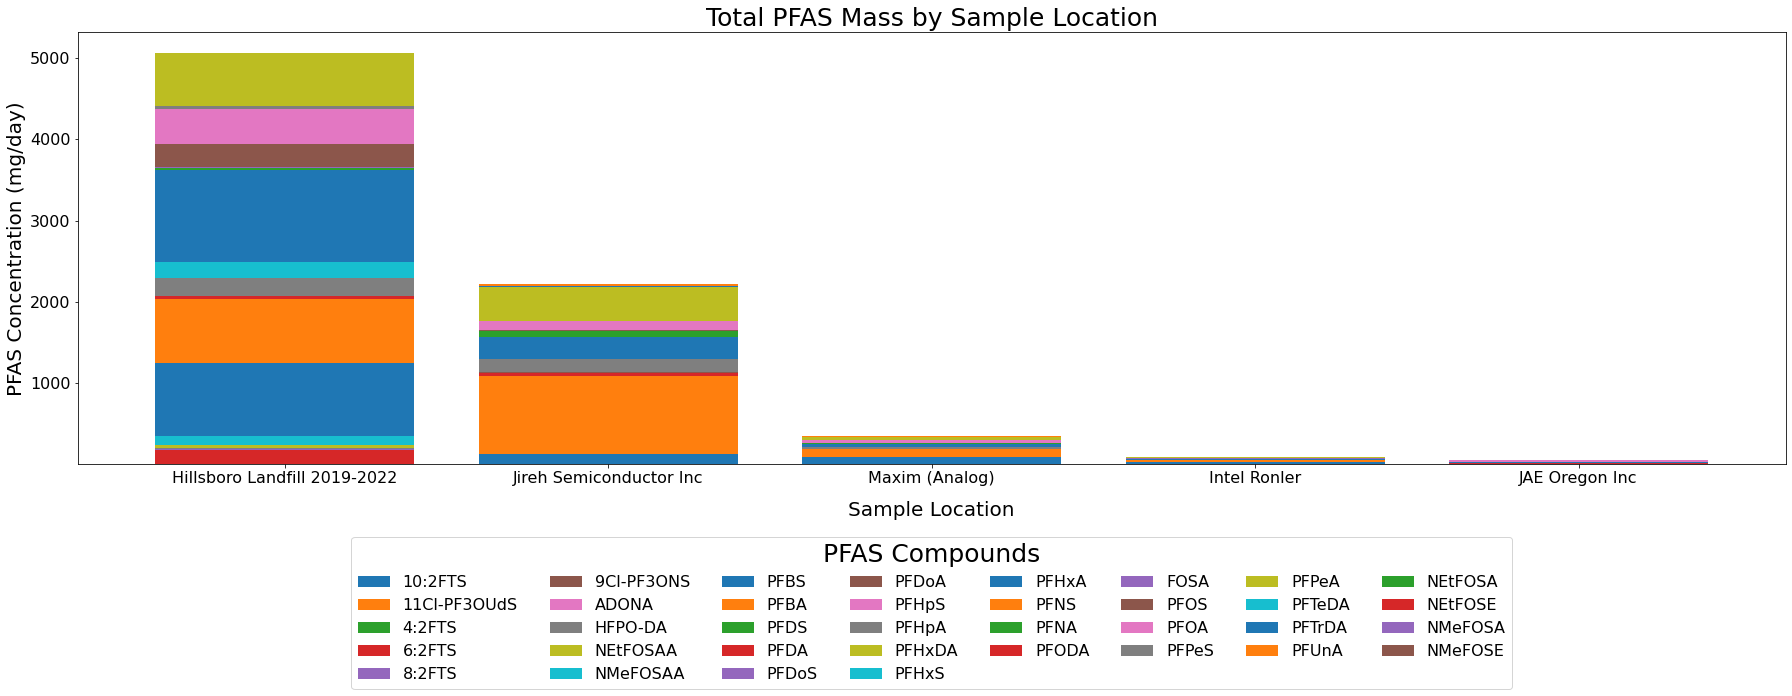

In [75]:
create_stacked_bar_chart(sorted_df,title_fontsize=25, axis_label_fontsize=20, tick_label_fontsize=16, xlabel_pad=15)

In [158]:
def create_stacked_bar_chart(df, color_dict, title_fontsize=18, axis_label_fontsize=16, tick_label_fontsize=14, xlabel_pad=20):
    """
    Create a stacked bar chart for PFAS concentrations at different sample locations using a specific color for each PFAS compound.

    Args:
    df (pd.DataFrame): The DataFrame with Sample Locations as columns and PFAS compounds as rows.
    color_dict (dict): Dictionary mapping PFAS compounds to their corresponding RGBA color code.
    title_fontsize (int): Font size for the title.
    axis_label_fontsize (int): Font size for the x and y axis labels.
    tick_label_fontsize (int): Font size for the tick labels.
    xlabel_pad (int): Padding for the x-axis label. Default is 20.

    Returns:
    None: The function will plot the stacked bar chart.
    """

    # Removing non-PFAS compound rows
    pf_compounds_df = df.drop([np.NaN])

    # Create a new figure and axis for the plot
    fig, ax = plt.subplots(figsize=(25, 10))

    # Bottom tracker for stacked bars
    bottom = np.zeros(len(df.columns))

    # Loop through each PFAS compound and create a stacked bar segment with the corresponding color
    for index, row in pf_compounds_df.iterrows():
        ax.bar(df.columns, row, bottom=bottom, color=color_dict.get(index, 'grey'), label=index)
        bottom += row

    # Set chart title and labels with custom font sizes
    ax.set_title('Total PFAS Mass by Sample Location', fontsize=title_fontsize)
    ax.set_xlabel('Sample Location', fontsize=axis_label_fontsize, labelpad=xlabel_pad)
    ax.set_ylabel('PFAS Concentration (mg/day)', fontsize=axis_label_fontsize)

    # Set the tick labels with custom font sizes
    ax.tick_params(axis='x', labelsize=tick_label_fontsize)
    ax.tick_params(axis='y', labelsize=tick_label_fontsize)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=0, ha='center')

    # Add legend with custom settings
    ax.legend(title='PFAS Compounds', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, title_fontsize=title_fontsize, fontsize=tick_label_fontsize)

    # Adjust the padding between the plot and the edge of the figure (optional)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# Assuming 'color_dict' is your dictionary of PFAS compounds to RGBA colors
# create_stacked_bar_chart(df, color_dict, title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=12, xlabel_pad=30)


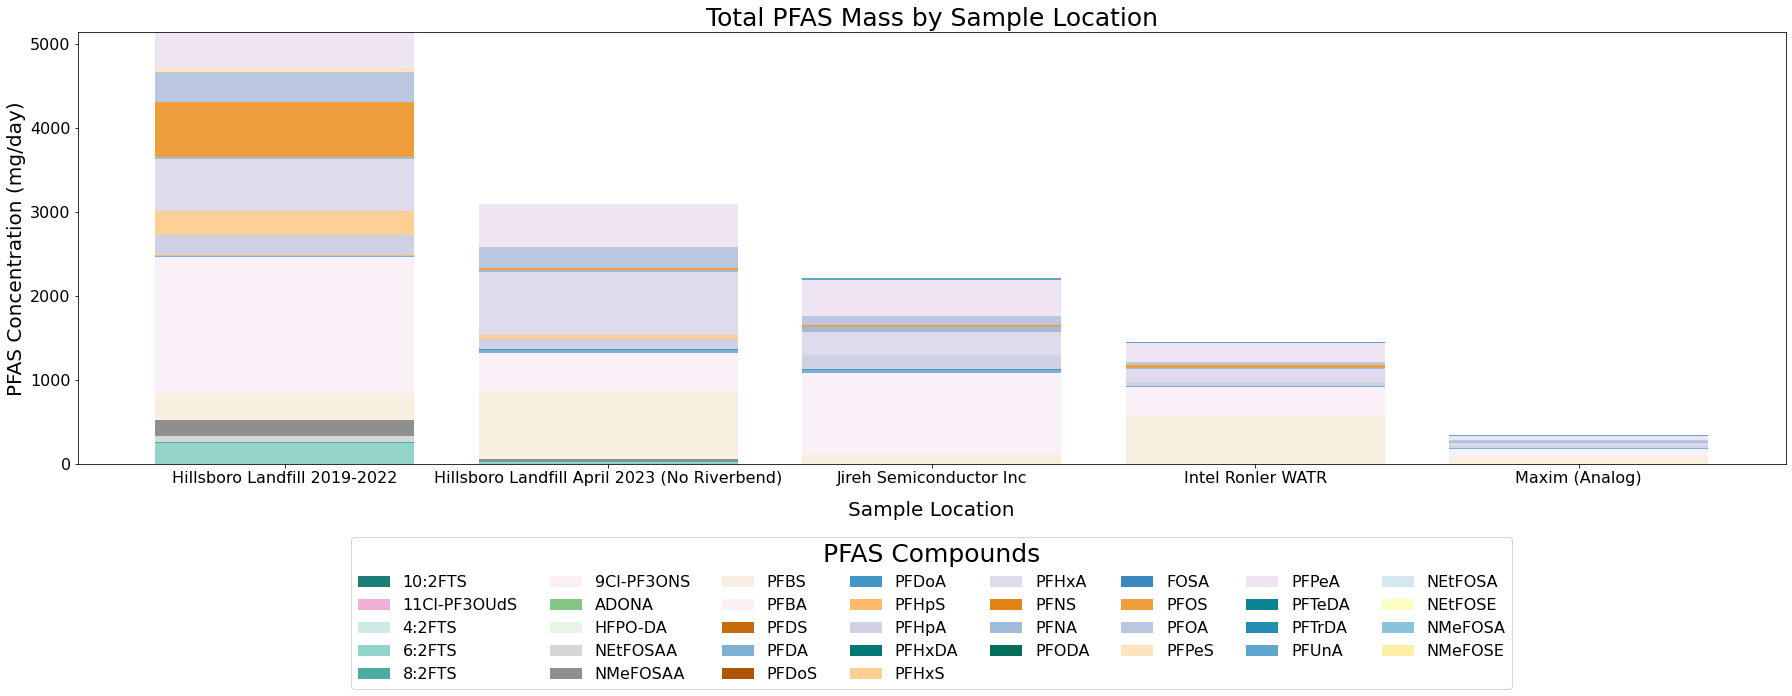

In [159]:
create_stacked_bar_chart(sorted_df, color_dict=compound_colors_dict_abbrev,title_fontsize=25, axis_label_fontsize=20, tick_label_fontsize=16, xlabel_pad=15)


In [166]:
pfas_compound_filter

['10:2Fluorotelomersulfonic acid',
 '11Cl-PF3OUdS',
 '4:2 Fluorotelomersulfonic acid',
 '6:2 Fluorotelomersulfonic acid',
 '8:2 Fluorotelomersulfonic acid',
 '9Cl-PF3ONS',
 'ADONA',
 'HFPO-DA',
 'NEtFOSAA',
 'NMeFOSAA',
 'Perfluorobutanesulfonic acid',
 'Perfluorobutanoic acid',
 'Perfluorodecanesulfonic acid',
 'Perfluorodecanoic acid',
 'Perfluorododecanesulfonic acid',
 'Perfluorododecanoic acid',
 'Perfluoroheptanesulfonic acid',
 'Perfluoroheptanoic acid',
 'Perfluorohexadecanoic acid',
 'Perfluorohexanesulfonic acid',
 'Perfluorohexanoic acid',
 'Perfluorononanesulfonic acid',
 'Perfluorononanoic acid',
 'Perfluorooctadecanoic acid',
 'Perfluorooctanesulfonamide',
 'Perfluorooctanesulfonic acid (PFOS)',
 'Perfluorooctanoic acid (PFOA)',
 'Perfluoropentanesulfonic acid',
 'Perfluoropentanoic acid',
 'Perfluorotetradecanoic acid',
 'Perfluorotridecanoic acid',
 'Perfluoroundecanoic acid',
 'NEtFOSA',
 'NEtFOSE',
 'NMeFOSA',
 'NMeFOSE']